In [1]:
# Variable 	                      Description
# Loan_ID	                      Unique Loan ID
# Gender	                      Male/ Female
# Married	                      Applicant married (Y/N)
# Dependents	                  Number of dependents
# Education	                      Applicant Education (Graduate/ Under Graduate)
# Self_Employed	                  Self employed (Y/N)
# ApplicantIncome	              Applicant income
# CoapplicantIncome	              Coapplicant income
# LoanAmount	                  Loan amount in thousands
# Loan_Amount_Term	              Term of loan in months
# Credit_History	              credit history meets guidelines
# Property_Area	                  Urban/ Semi Urban/ Rural
# Loan_Status	                  (Target) Loan approved (Y/N)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum()*100/614

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [10]:
df.dropna(subset=['Credit_History','Self_Employed','LoanAmount','Loan_Amount_Term'],inplace=True)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               2
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    430
180.0     38
480.0     14
300.0     10
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

In [13]:
df['Loan_Status'].value_counts()

Loan_Status
Y    345
N    159
Name: count, dtype: int64

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [15]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [17]:
df.shape

(504, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            504 non-null    object 
 1   Gender             504 non-null    object 
 2   Married            504 non-null    object 
 3   Dependents         504 non-null    object 
 4   Education          504 non-null    object 
 5   Self_Employed      504 non-null    object 
 6   ApplicantIncome    504 non-null    int64  
 7   CoapplicantIncome  504 non-null    float64
 8   LoanAmount         504 non-null    float64
 9   Loan_Amount_Term   504 non-null    float64
 10  Credit_History     504 non-null    float64
 11  Property_Area      504 non-null    object 
 12  Loan_Status        504 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 55.1+ KB


<Axes: xlabel='Gender', ylabel='count'>

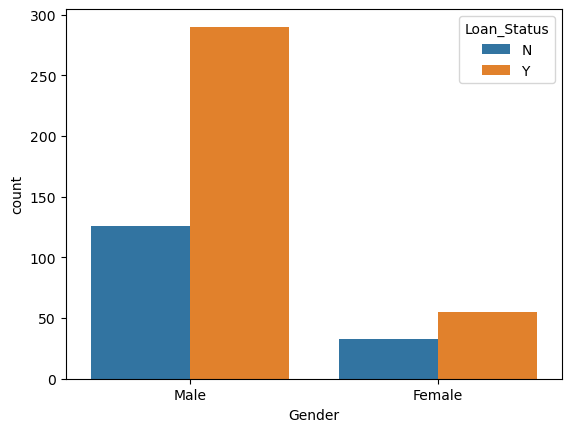

In [19]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

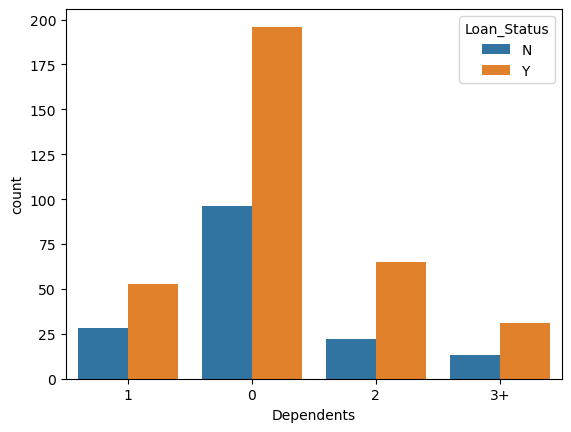

In [20]:
sns.countplot(data=df, x='Dependents', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

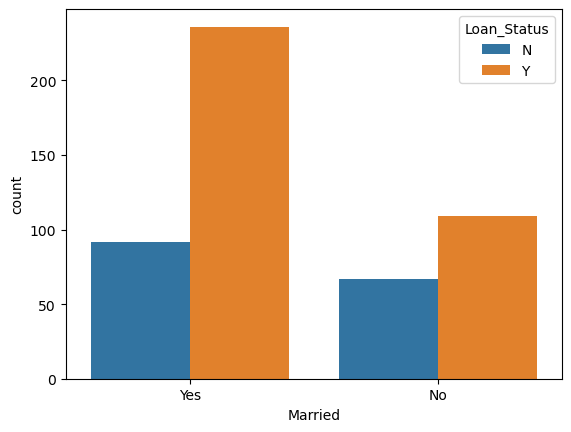

In [21]:
sns.countplot(data=df, x='Married', hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

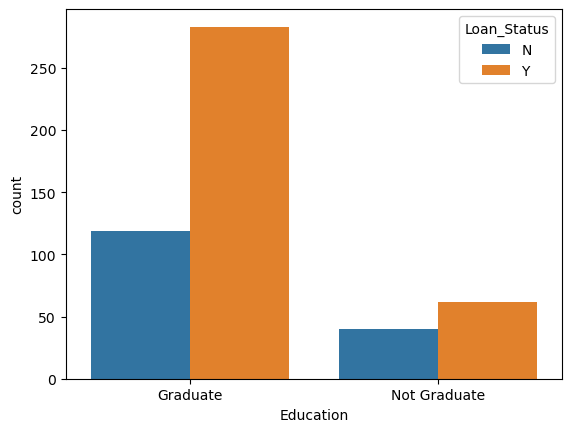

In [22]:
sns.countplot(data=df, x='Education', hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

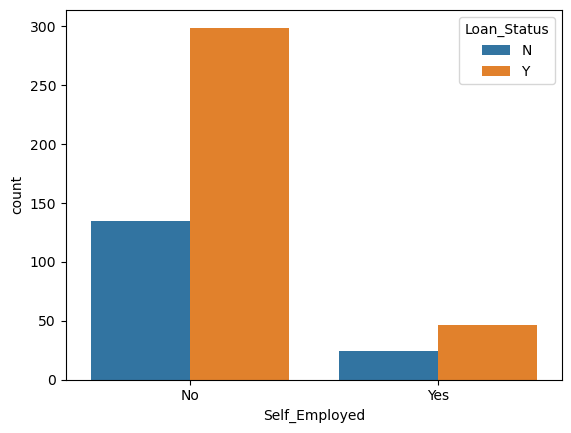

In [23]:
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

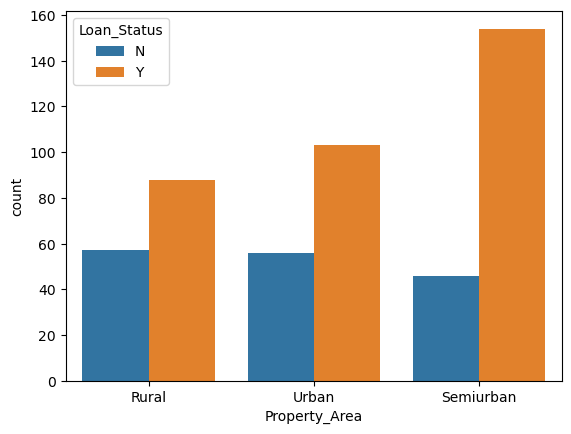

In [24]:
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

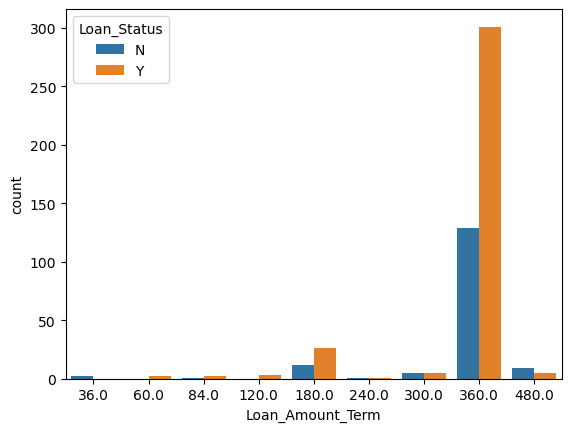

In [25]:
sns.countplot(data=df, x='Loan_Amount_Term', hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

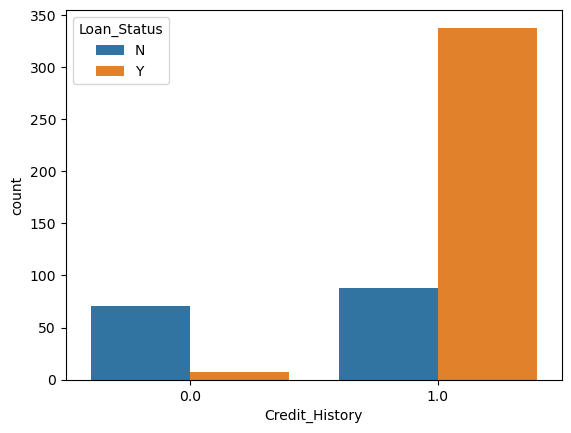

In [26]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

In [27]:
grouped = df.groupby(['Gender', 'Married', 'Dependents']).size().reset_index(name='Count')
grouped
# sns.barplot(data=grouped, x='Count', y=df['Loan_Status'])

,Gender,Married,Dependents,Count
0,Female,No,0,52
1,Female,No,1,9
2,Female,No,2,1
3,Female,No,3+,1
4,Female,Yes,0,16
5,Female,Yes,1,6
6,Female,Yes,2,3
7,Male,No,0,97
8,Male,No,1,6
9,Male,No,2,6


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

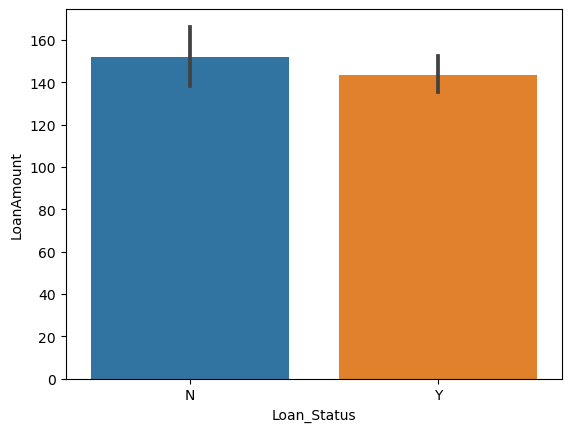

In [28]:
sns.barplot(data=df, x="Loan_Status", y="LoanAmount")

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

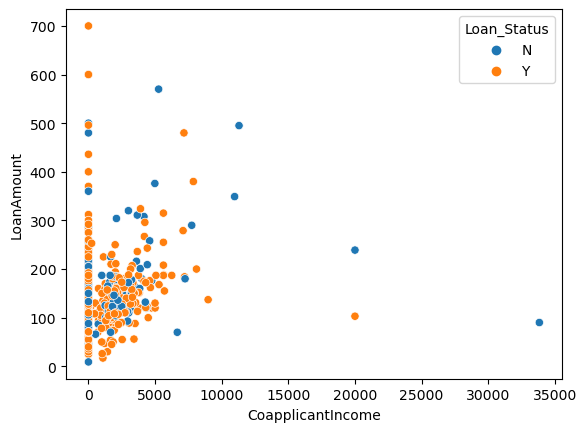

In [29]:
sns.scatterplot(data=df,x="CoapplicantIncome",y='LoanAmount',hue='Loan_Status')

In [30]:
group_byEdu = df.groupby(['Education','Gender','Property_Area','Loan_Status']).size().reset_index(name='count')
group_byEdu

,Education,Gender,Property_Area,Loan_Status,count
0,Graduate,Female,Rural,N,7
1,Graduate,Female,Rural,Y,8
2,Graduate,Female,Semiurban,N,11
3,Graduate,Female,Semiurban,Y,26
4,Graduate,Female,Urban,N,11
5,Graduate,Female,Urban,Y,12
6,Graduate,Male,Rural,N,31
7,Graduate,Male,Rural,Y,63
8,Graduate,Male,Semiurban,N,27
9,Graduate,Male,Semiurban,Y,99


In [31]:
group_byEdu['Group'] = group_byEdu['Education'] +'-'+ group_byEdu['Gender'] +'-'+ group_byEdu['Property_Area']
group_byEdu

,Education,Gender,Property_Area,Loan_Status,count,Group
0,Graduate,Female,Rural,N,7,Graduate-Female-Rural
1,Graduate,Female,Rural,Y,8,Graduate-Female-Rural
2,Graduate,Female,Semiurban,N,11,Graduate-Female-Semiurban
3,Graduate,Female,Semiurban,Y,26,Graduate-Female-Semiurban
4,Graduate,Female,Urban,N,11,Graduate-Female-Urban
5,Graduate,Female,Urban,Y,12,Graduate-Female-Urban
6,Graduate,Male,Rural,N,31,Graduate-Male-Rural
7,Graduate,Male,Rural,Y,63,Graduate-Male-Rural
8,Graduate,Male,Semiurban,N,27,Graduate-Male-Semiurban
9,Graduate,Male,Semiurban,Y,99,Graduate-Male-Semiurban


<Axes: xlabel='count', ylabel='Group'>

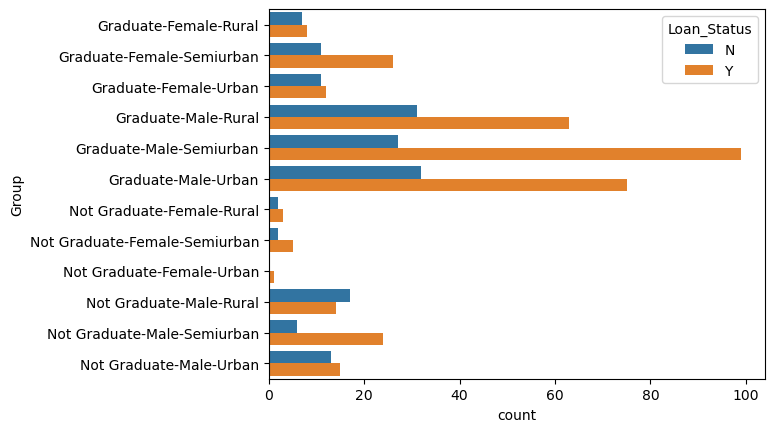

In [32]:
sns.barplot(data = group_byEdu,y = 'Group',x = 'count',hue = 'Loan_Status')

In [33]:
df['Duration']=df['Loan_Amount_Term_Year'] = df['Loan_Amount_Term']/12
df['Duration']

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Duration, Length: 504, dtype: float64

<Axes: xlabel='Duration', ylabel='LoanAmount'>

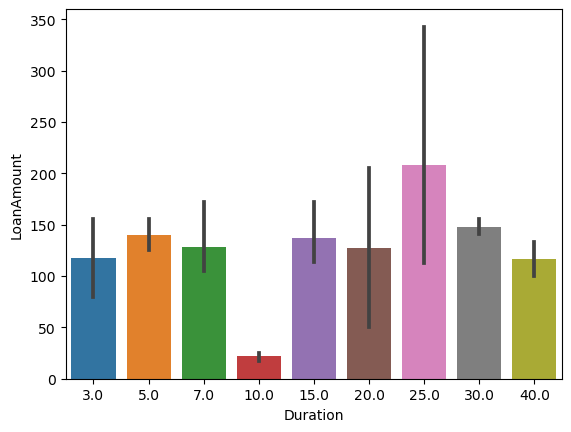

In [34]:
sns.barplot(data=df,x='Duration',y='LoanAmount')

In [35]:
# conver Duration into dtype
df['Duration'] = df['Duration'].astype(str)
df['Duration']

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Duration, Length: 504, dtype: object

In [36]:
group_Duration = df.groupby(['Education','Gender','Property_Area','Loan_Status','Duration']).size().reset_index(name='count')
group_Duration
group_Duration['Group'] = group_Duration['Education'] +'-'+ group_Duration['Gender'] +'-'+ group_Duration['Property_Area']+'-'+group_Duration['Duration']
group_Duration

,Education,Gender,Property_Area,Loan_Status,Duration,count,Group
0,Graduate,Female,Rural,N,30.0,6,Graduate-Female-Rural-30.0
1,Graduate,Female,Rural,N,40.0,1,Graduate-Female-Rural-40.0
2,Graduate,Female,Rural,Y,30.0,7,Graduate-Female-Rural-30.0
3,Graduate,Female,Rural,Y,40.0,1,Graduate-Female-Rural-40.0
4,Graduate,Female,Semiurban,N,25.0,1,Graduate-Female-Semiurban-25.0
...,...,...,...,...,...,...,...
60,Not Graduate,Male,Urban,N,30.0,7,Not Graduate-Male-Urban-30.0
61,Not Graduate,Male,Urban,N,40.0,2,Not Graduate-Male-Urban-40.0
62,Not Graduate,Male,Urban,Y,15.0,4,Not Graduate-Male-Urban-15.0
63,Not Graduate,Male,Urban,Y,30.0,10,Not Graduate-Male-Urban-30.0


<Axes: xlabel='Duration', ylabel='count'>

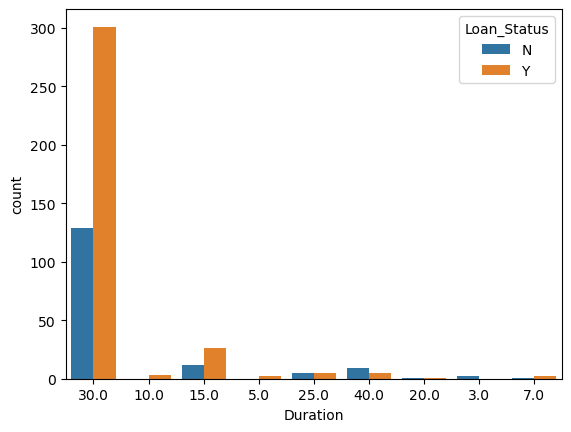

In [37]:
sns.countplot(data =df,x='Duration',hue = 'Loan_Status')

In [38]:
# q1= df['ApplicantIncome'].quantile(0.25)
# q3= df['ApplicantIncome'].quantile(0.75)
# iqr= q3-q1
# lf= q1- 1.5*iqr
# uf= q3+ 1.5*iqr
# outliers= df[(df['ApplicantIncome']<lf) | (df['ApplicantIncome']>uf)]
# print("Percentage of outliers in", df['ApplicantIncome'] ,outliers.shape[0]*100/df.shape[0])
# fig, ax= plt.subplots(1,2, figsize=(6,4))
# ax[0].boxplot(df['ApplicantIncome'])
# ax[1].hist(df['ApplicantIncome'])
# plt.show()
# df.loc[(df['ApplicantIncome']<lf) | (df['ApplicantIncome']>uf),df['ApplicantIncome']]= df['ApplicantIncome'].median()

In [39]:
# q1= df['CoapplicantIncome'].quantile(0.25)
# q3= df['CoapplicantIncome'].quantile(0.75)
# iqr= q3-q1
# lf= q1- 1.5*iqr
# uf= q3+ 1.5*iqr
# outliers= df[(df['CoapplicantIncome']<lf) | (df['CoapplicantIncome']>uf)]
# print("Percentage of outliers in", df['CoapplicantIncome'] ,outliers.shape[0]*100/df.shape[0])
# fig, ax= plt.subplots(1,2, figsize=(6,4))
# ax[0].boxplot(df['CoapplicantIncome'])
# ax[1].hist(df['CoapplicantIncome'])
# plt.show()
# df.loc[(df['CoapplicantIncome']<lf) | (df['CoapplicantIncome']>uf),df['CoapplicantIncome']]= df['CoapplicantIncome'].median()

In [40]:
# q1= df['LoanAmount'].quantile(0.25)
# q3= df['LoanAmount'].quantile(0.75)
# iqr= q3-q1
# lf= q1- 1.5*iqr
# uf= q3+ 1.5*iqr
# outliers= df[(df['LoanAmount']<lf) | (df['LoanAmount']>uf)]
# print("Percentage of outliers in", df['LoanAmount'] ,outliers.shape[0]*100/df.shape[0])
# fig, ax= plt.subplots(1,2, figsize=(6,4))
# ax[0].boxplot(df['LoanAmount'])
# ax[1].hist(df['LoanAmount'])
# plt.show()
# df.loc[(df['LoanAmount']<lf) | (df['LoanAmount']>uf),df['LoanAmount']]= df['LoanAmount'].median()

In [41]:
# sns.heatmap(df.loc[:,num].corr(),annot = True)